# Supply Chain Dashboard Development with Power BI - Data Preprocessing

## Impporting librairies

In [4]:
# Importing librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Importing dataset

In [5]:
# Importing dataset
supply = pd.read_excel(r"D:\Projects\IT\Data Science & IA\datascience\supply_chain_data.xlsx")

# Print database
supply

,ID,Delivery Date,Estimated Delivery Date,Delivery Delay,Delivery Status,Stock Level,Sales,Transportation Cost,Restock Needed,Region,Supplier,Item
0,1,2025-02-17,2025-02-17,0,1,55,45,644.92,Yes,East,Supplier B,Product A
1,2,2025-02-17,2025-02-17,0,0,77,18,440.75,No,South,Supplier B,Product D
2,3,2025-02-17,2025-02-17,0,1,97,16,310.18,No,West,Supplier C,Product E
3,4,2025-02-17,2025-02-17,0,0,136,25,213.36,No,North,Supplier C,Product E
4,5,2025-02-17,2025-02-17,0,0,175,25,832.97,No,North,Supplier B,Product B
...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,2025-02-17,2025-02-17,0,-1,50,31,943.21,Yes,South,Supplier D,Product C
696,697,2025-02-17,2025-02-17,0,0,155,33,681.76,No,West,Supplier A,Product A
697,698,2025-02-17,2025-02-17,0,1,63,23,735.38,No,West,Supplier D,Product C
698,699,2025-02-17,2025-02-17,0,1,166,22,284.31,No,East,Supplier A,Product E


## Data Info

In [6]:
#Print data 
supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       700 non-null    int64         
 1   Delivery Date            700 non-null    datetime64[ns]
 2   Estimated Delivery Date  700 non-null    datetime64[ns]
 3   Delivery Delay           700 non-null    int64         
 4   Delivery Status          700 non-null    int64         
 5   Stock Level              700 non-null    int64         
 6   Sales                    700 non-null    int64         
 7   Transportation Cost      700 non-null    float64       
 8   Restock Needed           700 non-null    object        
 9   Region                   700 non-null    object        
 10  Supplier                 700 non-null    object        
 11  Item                     700 non-null    object        
dtypes: datetime64[ns](2), float64(1), in

In [8]:
supply.columns

Index(['ID', 'Delivery Date', 'Estimated Delivery Date', 'Delivery Delay',
       'Delivery Status', 'Stock Level', 'Sales', 'Transportation Cost',
       'Restock Needed', 'Region', 'Supplier', 'Item'],
      dtype='object')

## Print data missing

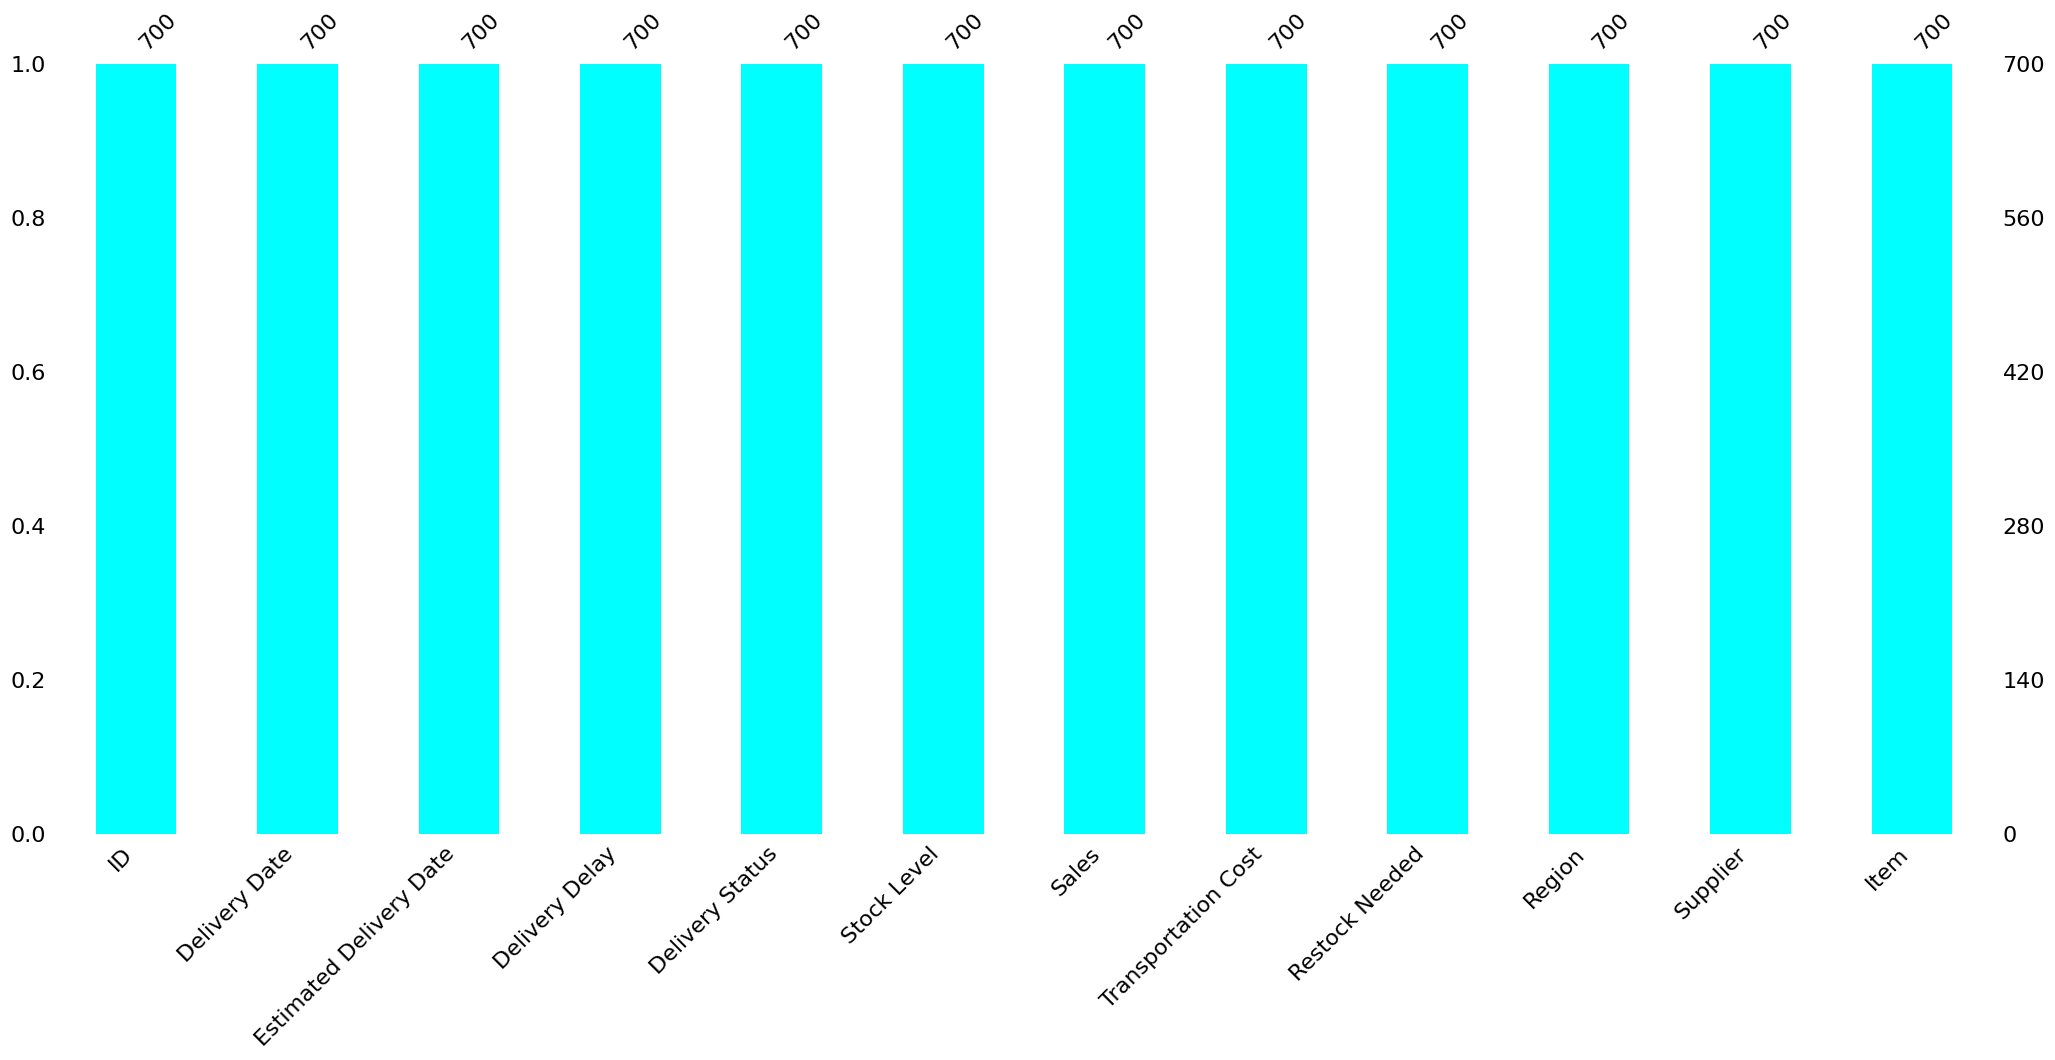

In [7]:
# Print data missing
dataMissing_supply = msno.bar(supply, color='cyan')

## Deleting of categoricals variables

In [10]:
# Deletion of categoricals variables
suppli = supply.select_dtypes(exclude=['object']).drop(columns=['Delivery Date', 'Estimated Delivery Date'])

suppli

,ID,Delivery Delay,Delivery Status,Stock Level,Sales,Transportation Cost
0,1,0,1,55,45,644.92
1,2,0,0,77,18,440.75
2,3,0,1,97,16,310.18
3,4,0,0,136,25,213.36
4,5,0,0,175,25,832.97
...,...,...,...,...,...,...
695,696,0,-1,50,31,943.21
696,697,0,0,155,33,681.76
697,698,0,1,63,23,735.38
698,699,0,1,166,22,284.31


## Outliers detection

In [16]:
# Outliers detection by IQR method
number_data = suppli.select_dtypes(include=['number'])
Q1= number_data.quantile(0.25)
Q3 = number_data.quantile(0.75)
IQR = Q3 - Q1
outliers_detection = (number_data<(Q1-(1.5*IQR))|number_data>(Q3+(1.5*IQR)))
outliers = number_data[outliers_detection.any(axis=1)]
outliers

TypeError: unsupported operand type(s) for |: 'float' and 'int'